# Importing Packages & Set Up Data Layout

## Preprocessing Information for the Given Data.

A high-pass filter with a 30 Hz cut-off frequency and a power line notch filter (50 Hz) were used. All recordings are artifact-free EEG segments of 60 seconds duration. At the stage of data preprocessing, the Independent Component Analysis (ICA) was used to eliminate the artifacts (eyes, muscle, and cardiac overlapping of the cardiac pulsation). The arithmetic task was the serial subtraction of two numbers. Each trial started with the communication orally 4-digit (minuend) and 2-digit (subtrahend) numbers (e.g. 3141 and 42).

In [ ]:
# Let's load some packages we need (pip install mne)
import mne
import mne.viz
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# ! pip install mne

# Read raw data files where each file contains a run
files = ['../datasets/HW2Datasets/Subject06_1.edf', '../datasets/HW2Datasets/Subject06_2.edf', '../datasets/HW2Datasets/Subject07_1.edf', '../datasets/HW2Datasets/Subject07_2.edf']

# Read the raw EDF files into an array
raws = [read_raw_edf(f, preload=True) for f in files]

# Loop through the array and make the following changes to the raw files
for raw in raws:

    # Rename the raw channels
    raw.rename_channels({'EEG F3':'F3', 'EEG F4':'F4',
                            'EEG Fp1':'Fp1', 'EEG Fp2':'Fp2', 'EEG F7':'F7', 'EEG F8':'F8',
                            'EEG T3':'T3', 'EEG T4':'T4', 'EEG C3':'C3', 'EEG C4':'C4',
                            'EEG T5':'T5', 'EEG T6':'T6', 'EEG P3':'P3', 'EEG P4':'P4',
                            'EEG O1':'O1', 'EEG O2':'O2', 'EEG Fz':'Fz', 'EEG Cz':'Cz',
                            'EEG Pz':'Pz', 'EEG A2-A1':'A2', 'ECG ECG':'ECG'})


    # Set channel types
    raw.set_channel_types({'ECG':'ecg'})

    # Define the channel locations
    raw.set_montage(mne.channels.make_standard_montage('standard_1020'))

    # Print Raw Channel Names for double checking
    print(raw.ch_names)

# Rename the raws with more insightfull names
subject6_background = raws[0] # Subject 6 background raw
subject6_task = raws[1] # Subject 6 task raw
subject7_background = raws[2] # Subject 7 background raw
subject7_task = raws[3] # Subject 7 task raw

Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject06_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject07_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject07_2.edf...
EDF file de

# Q3)
## Plot the time domain signal in Alpha band (8-12 Hz) for the two conditions (background and task). Discuss the main differences between the two groups.
There are 21 channels of which there are 4 different files to observe. So what I am going to do is pick 5 channels from different sections of the brain near the center (Fp1, Fz, Cz, Pz, & O1) to analyze given the 4 different files (subject 6 background, subject 6 task, subject 7 background, subject 7 task). This will reduce the number of plots analyzed from 84 to 20 without lossing to much insight.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ri

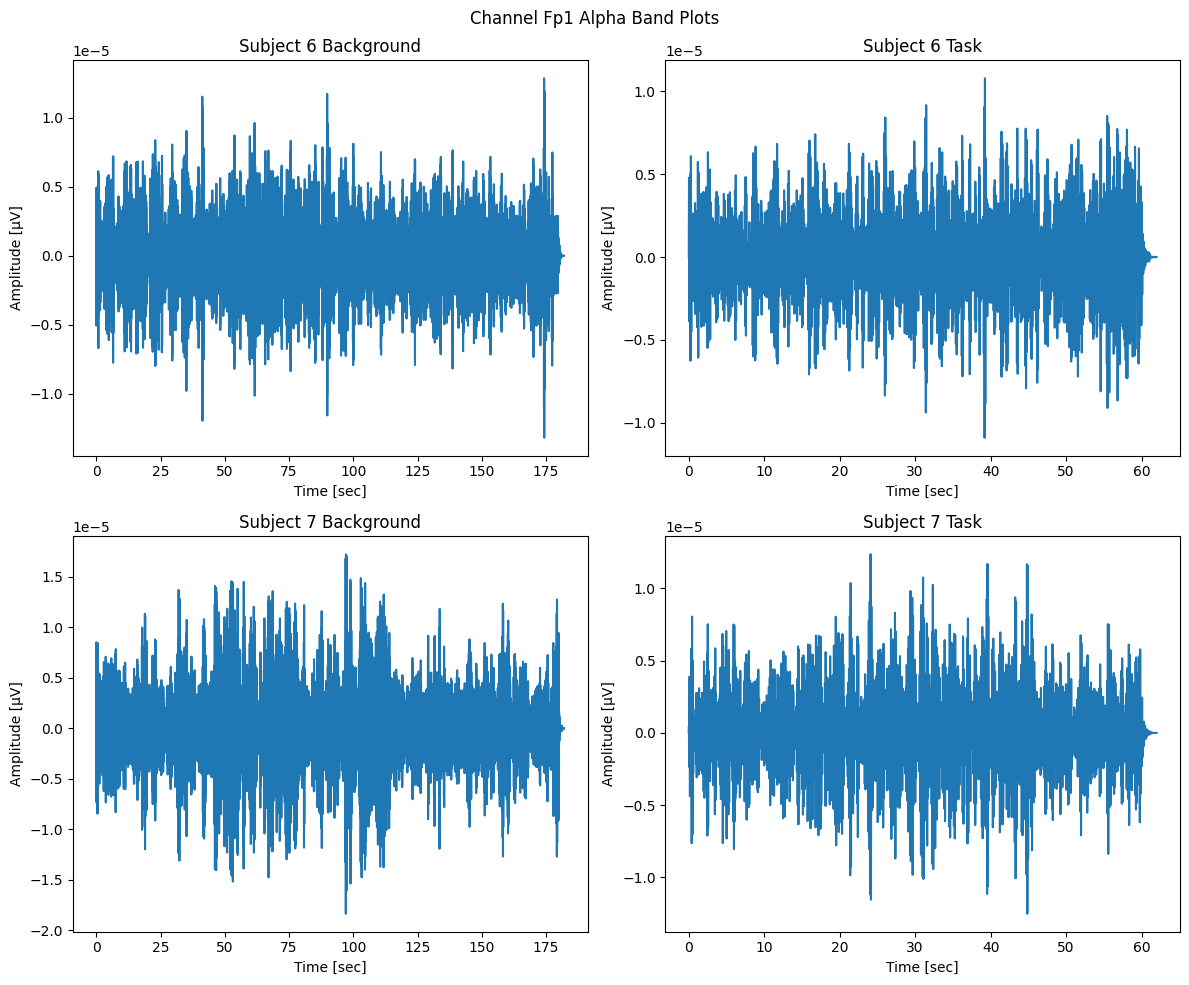

In [ ]:
# Let us explore some frequency bands
def alpha_band_plot(raws, channel_name):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10)) # create subplot for easier viewing
    # Loop through the various raw files and a nested loop for easier subploting
    for r in range(2):
        for c in range(2):
            raw = raws[2*r+c] # get the correct raw file
            raw_copy = raw.copy() # avoid deletion of other channels through copying raw
            raw_copy.pick_channels([channel_name]) # pick the given channel
            sfreq = raw_copy.info['sfreq']  # Sampling frequency

            # bandpass filter
            raw_copy.filter(8, 12, l_trans_bandwidth=1, h_trans_bandwidth=1)

            # Create time axis in seconds
            n_samples = raw_copy._data.shape[1]
            time_in_sec = np.arange(n_samples) / sfreq

            eeg_data = raw_copy.get_data()[0]  # Get the data of the picked channel

            # make sure filter params are the same
            axs[r, c].plot(time_in_sec, eeg_data)

            # Choose the title based on the given raw files content
            title = ''
            if 2*r+c == 0:
                title = 'Subject 6 Background'
            if 2*r+c == 1:
                title = 'Subject 6 Task'
            if 2*r+c == 2:
                title = 'Subject 7 Background'
            if 2*r+c == 3:
                title = 'Subject 7 Task'

            axs[r, c].set_ylabel('Amplitude [µV]') # add clear y-label
            axs[r, c].set_xlabel('Time [sec]') # add clear x-label
            axs[r, c].set_title(f'{title}') # add clear title to subplot
    fig.suptitle(f'Channel {channel_name} Alpha Band Plots') # add clear title to plot
    plt.tight_layout() # add correct distancing between subplots
    plt.show() # show plot

alpha_band_plot(raws, 'Fp1') # Plot the Alpha band adjusted intensity for all raw files in the channel Fp1

The plot is over channel Fp1 and something we can clearly see here is the amplitude is reaching a high peak in the alpha band range at 1.65uV which is higher than the other subplots here. One thing that seems interesting is the fact that the intensity of the amplitude also seems to drop for subject 7 from background to task in a vary meaningful way. This could be because subject 7 was anxious. Also Subject 7 seems to have higher amplitude in both subplots in comparision to subject 6 which could be an indecator that more connections are being at the alpha band level for subject 7.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ri

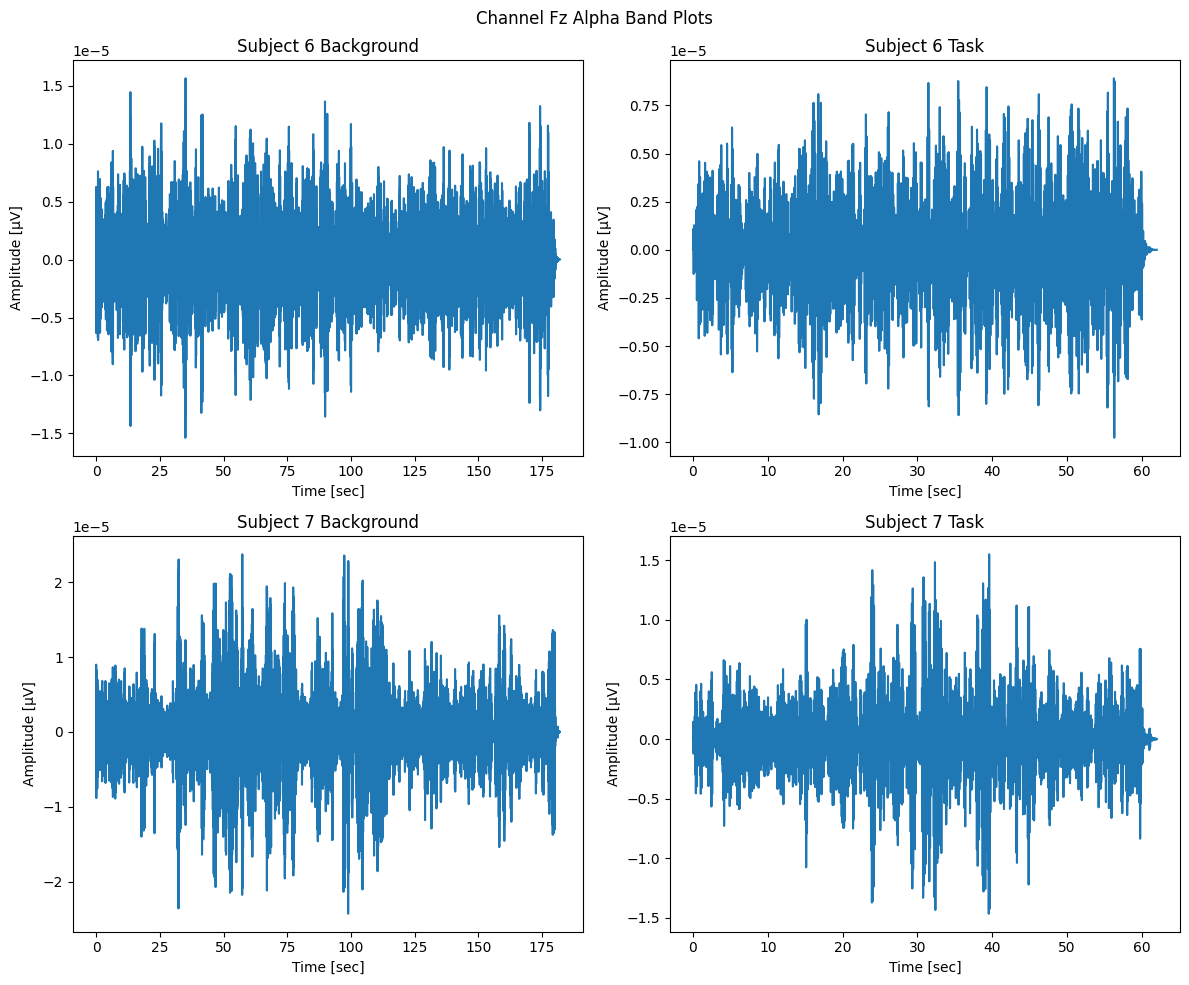

In [ ]:
alpha_band_plot(raws, 'Fz') # Plot the Alpha band adjusted intensity for all raw files in the channel Fz

The plot is over channel Fz and subject 7 again has a large amplitude in both regions in comparision to subject 6 in comparing background to background and task to task. For the background subject 7 has around 40% more intesive spikes at the extreme amplitude levels. For the task however, subject 7 has a 2x more amplitude in the extreme case and even one the normal case has substantially more amplitude in comparision to subject 7. Overall there is more brain activty here for subject 7 on channel Fz in the alpha band range.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ri

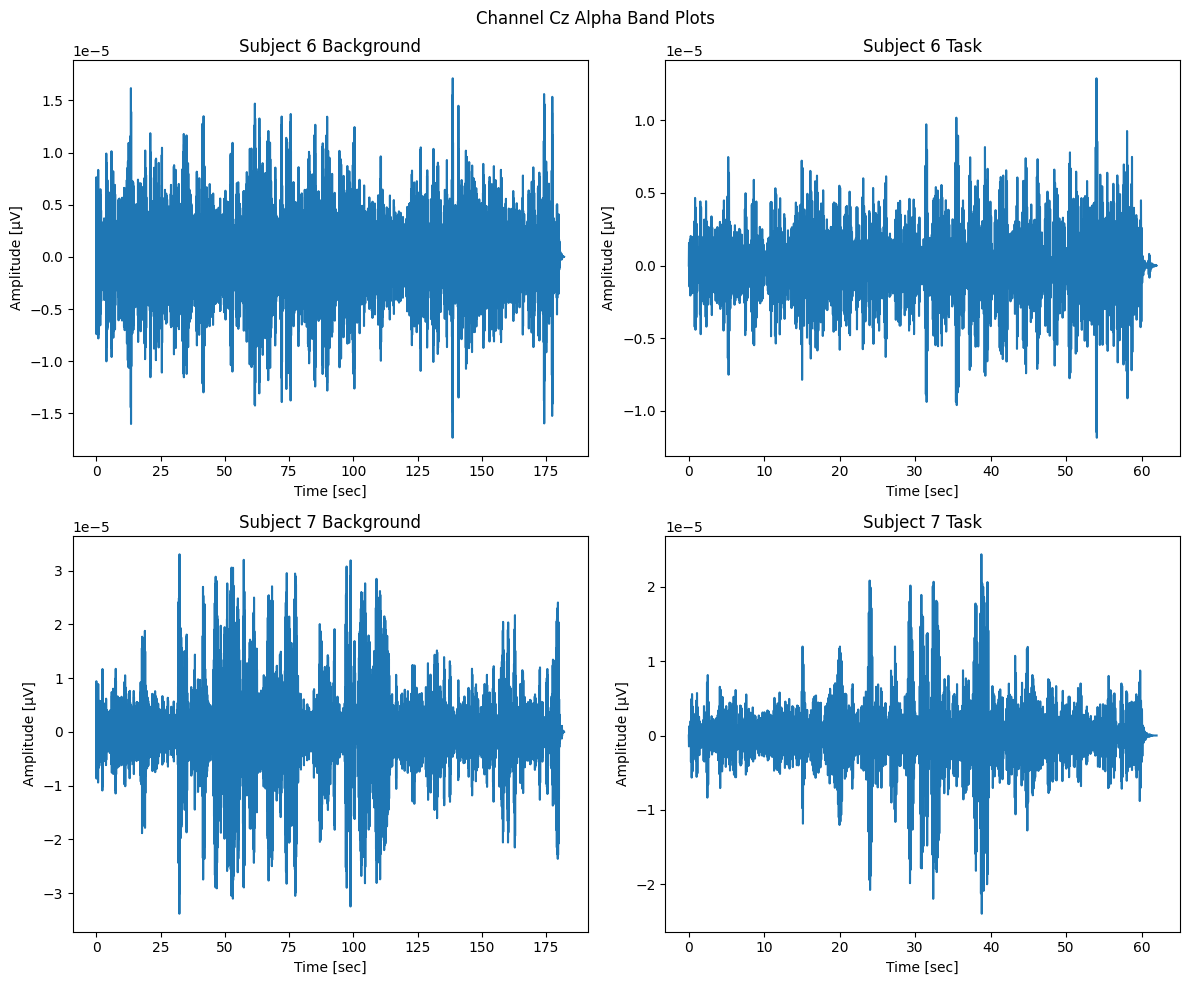

In [ ]:
alpha_band_plot(raws, 'Cz') # Plot the Alpha band adjusted intensity for all raw files in the channel Cz

The plot above is on channel Cz and the trends from Fz are present here. Subject 7 has higher amplitudes in both regions in comparision to subject 6 in comparing background to background and task to task. 2x higher amplitudes present in both comparision on the extreme case and still a substantial different in the normal cases. Seems like subject 7 has more brain activity in the alpha band range on channel Cz.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ri

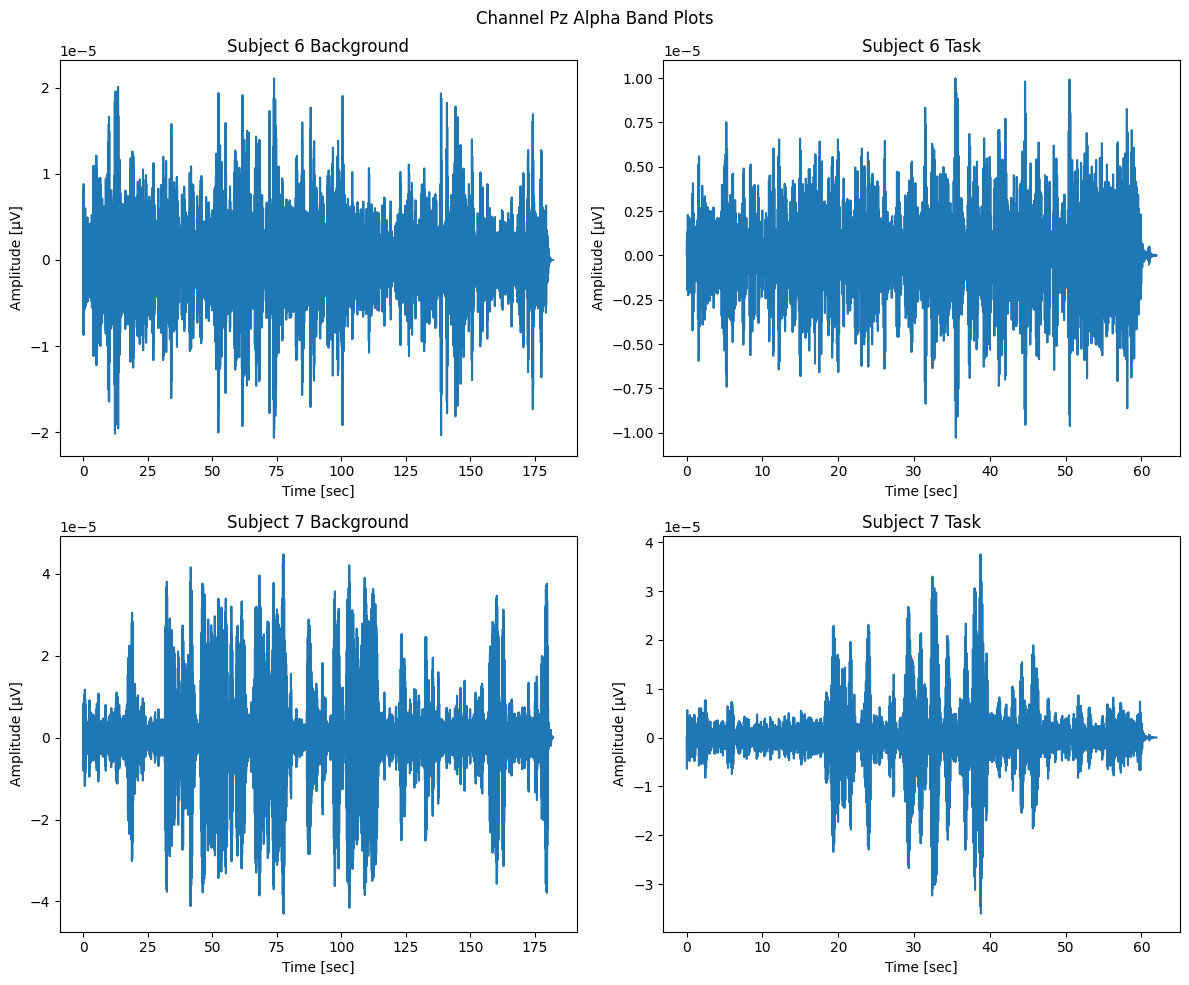

In [ ]:
alpha_band_plot(raws, 'Pz') # Plot the Alpha band adjusted intensity for all raw files in the channel Pz

The plot above is on channel Pz and the trends from Fz are present here as well, but even more extreme. Subject 7 has higher amplitudes in both regions in comparision to subject 6 in comparing background to background and task to task. 2x higher amplitudes present in background plots and 4x higher amplitudes in task plots. However there are extreme lows in both cases in subject 7 plots, but the could be a sign that signal are clearly passing here that just are not for subject 6 at least on the alpha band range level. Seems like subject 7 has more brain activity in the alpha band range on channel Cz.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ri

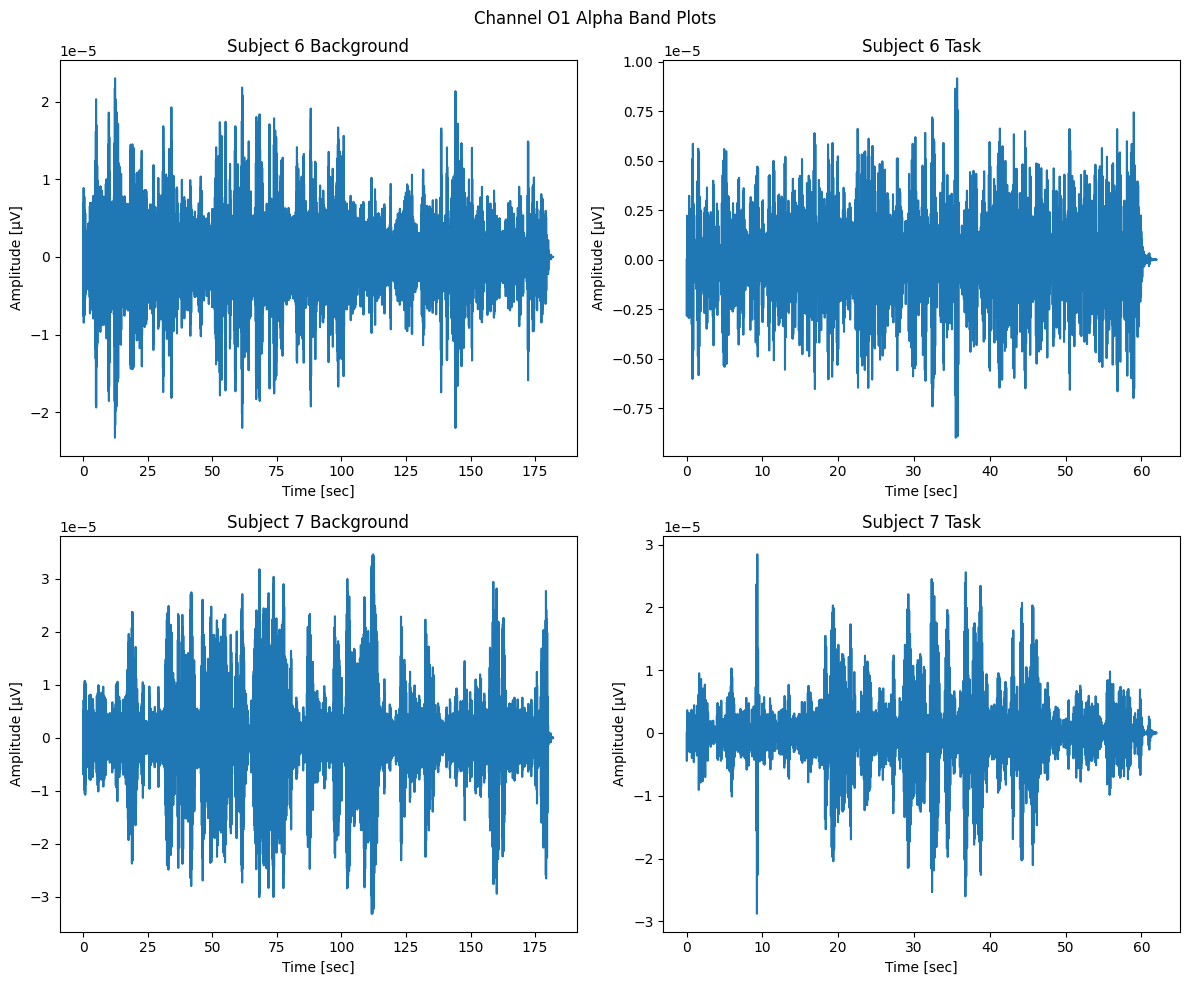

In [ ]:
alpha_band_plot(raws, 'O1') # Plot the Alpha band adjusted intensity for all raw files in the channel O1

The plot above is on channel O1 and the trends from Fz are present here. Subject 7 has higher amplitudes in both regions in comparision to subject 6 in comparing background to background and task to task. 1.5x higher amplitudes present in background to background and 3x higher amplitdues present in task to task. There are more intensive spikes on subject 7 plots in comparison to subject 6. Seems like subject 7 has more brain activity in the alpha band range on channel O1.

### Overall Thoughts and Conclusions

Subject 7 has more alpha band level activity going throughout all aspects of the brain in comparision to subject 6. During the task, this intensity seems to grow even further with many high spikes going off. This could tell is that depending on the problem, the intensity of the jolt changed to be more or less intense, especially in that given region in the brain where the channel was located. We can conclude that subject 7 was more relaxed in comparision to subject 6 because of the higher amplitude of the alpha band range present (Alpha band being a common range for relaxed and passive attention). This also shows in the subject info because subject 7 did better in solving more math problems and was problably more comfortable with the material and therefore more relaxed in the task.